#Dijkstra's Algorithm
###Implementation of Dijkstra's algorithm for finding shortest path on a network

Visualization of a graph

In [ ]:
from graphviz import Digraph 

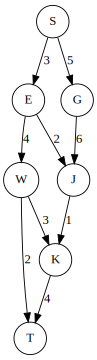

In [ ]:
#code for graph
g = Digraph('SimpleDigraph', filename='simpleDigraph.gv')
g.attr(size='8,5')
g.attr('node', shape='circle')
#nodes on graph
g.node('S')
g.node('E')
g.node('G')
g.node('J')
g.node('W')
g.node('K')
g.node('T')
#edges between nodes
g.edge('S', 'E', label='3')
g.edge('S', 'G', label='5')
g.edge('E', 'J', label='2')
g.edge('G', 'J', label='6')
g.edge('E', 'W', label='4')
g.edge('W', 'T', label='2')
g.edge('W', 'K', label='3')
g.edge('J', 'K', label='1')
g.edge('K', 'T', label='4')
#showing graph
g

####Storing Graph as a data structure

In [ ]:
#first example, nodes as elements in dict with some way to represent nodes edges as value
graph = {'S': [('E', 3), ('G', 5)], 'E': [('W', 4),('J', 2)], 'G': [('J', 6)], 'W': [('T', 2),('K', 3)], 'J': [('K', 1)], 'K': [('T', 4)]}

In [ ]:
#showing node S representation in dict
print(f"Node S connects to node {graph['S'][0][0]} with length {graph['S'][0][1]}")
print(f"Node S connects to node {graph['S'][1][0]} with length {graph['S'][1][1]}")

Node S connects to node E with length 3
Node S connects to node G with length 5


####User input of a graph

In [50]:
#input of nodes
node_connections = []
#splitting and uppercasing nodes input
nodes = tuple(str(input("Please enter all nodes (Comma seperated, e.g., 'S, E, G, H, U, T')\nYour Input: ")).split(', '))
print(f"All nodes: {nodes}")
#loop through nodes and get their connections
for n in nodes:
  if n != 'T':
    connections = str(input(f"Please enter all nodes that node {n} connects to (Comma seperated, e.g., 'H, G, T')\nYour Input: ")).split(', ')
    node_connections.append(connections)
  else:
    break    
for i in range(len(nodes)-1):
  print(f"Node {nodes[i]} connects to {node_connections[i]}") 
#getting M value (upper bound of randomized arc weights)
m = int(input("Please Enter Your m Value(upper bound of randomized arc weights): "))

Please enter all nodes (Comma seperated, e.g., 'S, E, G, H, U, T')
Your Input: S, E, G, W, J, K, T
All nodes: ('S', 'E', 'G', 'W', 'J', 'K', 'T')
Please enter all nodes that node S connects to (Comma seperated, e.g., 'H, G, T')
Your Input: E, G
Please enter all nodes that node E connects to (Comma seperated, e.g., 'H, G, T')
Your Input: W, J
Please enter all nodes that node G connects to (Comma seperated, e.g., 'H, G, T')
Your Input: J
Please enter all nodes that node W connects to (Comma seperated, e.g., 'H, G, T')
Your Input: T, K
Please enter all nodes that node J connects to (Comma seperated, e.g., 'H, G, T')
Your Input: K
Please enter all nodes that node K connects to (Comma seperated, e.g., 'H, G, T')
Your Input: T
Node S connects to ['E', 'G']
Node E connects to ['W', 'J']
Node G connects to ['J']
Node W connects to ['T', 'K']
Node J connects to ['K']
Node K connects to ['T']
Please Enter Your m Value(upper bound of randomized arc weights): 10


#####Randomize arc weights

In [51]:
import random

In [52]:
#storing temp dict representation of connections
all_temps = []
#loop through node connections and create temp dicts with node:weight
for n in node_connections:
  temp_dict = {}
  for i in n:
    temp_dict[i] = random.randint(1, m)
  all_temps.append(temp_dict)
all_temps

[{'E': 1, 'G': 3},
 {'J': 2, 'W': 10},
 {'J': 7},
 {'K': 4, 'T': 7},
 {'K': 7},
 {'T': 3}]

#####Get node connections into dictionary{string: dictionary} format for Dijkstra's

In [54]:
#loop through nodes and all temp dicts, append all to super dict
graph = {}
for i in range(len(nodes)-1):
  graph[nodes[i]] = all_temps[i]
graph['T'] = {}
graph

{'E': {'J': 2, 'W': 10},
 'G': {'J': 7},
 'J': {'K': 7},
 'K': {'T': 3},
 'S': {'E': 1, 'G': 3},
 'T': {},
 'W': {'K': 4, 'T': 7}}

#####Testing unordered dict with dijkstra's

In [56]:
#dijkstra's through unordered dict
unvisited = {node: None for node in nodes} #using None as infinity
visited = {}
current = 'S'
currentDistance = 0
unvisited[current] = currentDistance

while True:
    for neighbour, distance in graph[current].items():
        if neighbour not in unvisited: continue
        newDistance = currentDistance + distance
        if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
            unvisited[neighbour] = newDistance
    visited[current] = currentDistance
    del unvisited[current]
    if not unvisited: break
    candidates = [node for node in unvisited.items() if node[1]]
    current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]

print(visited)
print(f"Shortest S-T path is {visited['T']}")

{'S': 0, 'E': 1, 'G': 3, 'J': 3, 'K': 10, 'W': 11, 'T': 13}
Shortest S-T path is 13


####Dijkstra's Algorithm
(Hyperboreus stack overflow answer)

In [57]:
nodes = ('S', 'E', 'G', 'W', 'J', 'K', 'T')
distances = {
    'S': {'E': 1, 'G': 3},
    'E': {'W': 10, 'J': 2},
    'G': {'J': 7},
    'W': {'T': 7, 'K': 4},
    'J': {'K': 7},
    'K': {'T': 3},
    'T': {}}

unvisited = {node: None for node in nodes} #using None as infinity
visited = {}
current = 'S'
currentDistance = 0
unvisited[current] = currentDistance

while True:
    for neighbour, distance in distances[current].items():
        if neighbour not in unvisited: continue
        newDistance = currentDistance + distance
        if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
            unvisited[neighbour] = newDistance
    visited[current] = currentDistance
    del unvisited[current]
    if not unvisited: break
    candidates = [node for node in unvisited.items() if node[1]]
    current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]

print(visited)
print(f"Shortest S-T path is {visited['T']}")

{'S': 0, 'E': 1, 'G': 3, 'J': 3, 'K': 10, 'W': 11, 'T': 13}
Shortest S-T path is 13
